<a href="https://colab.research.google.com/github/Mukiti-Ryan/Customer-Churn-Prediction/blob/main/Model_Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer Churn Prediction with Bank Data**
---
This is a tutorial of a customer churn machine learning model created using the following:

1. GradientBoosting (XG-Boost)
2. Streamlit
3. Docker

In this section we will be evaluating the metrics of the model built.

# 1. Let's start by importing the required libraries and loading the dataset into memory
---



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/churnmodel.csv')

df.shape

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(1000000, 16)

Let's make all the changes we did to the dataset in the previous Colab document

In [ ]:
if 'Unnamed: 0' in df.columns:
  df = df.drop(columns = ['Unnamed: 0'])

df.drop(['CD_ACCOUNT'], axis = 1, inplace = True)

In [ ]:
df['STATUS2'] = df['STATUS2'].map({'CHURNED': 1, 'NOT CHURNED': 0})
df['STATUS2'].value_counts()

0    500000
1    500000
Name: STATUS2, dtype: int64

In [ ]:
df['CD_TYPE'] = df['CD_TYPE'].map({1062: 1, 1063: 0})
df['CD_TYPE'].value_counts()

1    933953
0     66047
Name: CD_TYPE, dtype: int64

In [ ]:
df['VL_TENOR'] = df['VL_TENOR'].abs()

In [ ]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
  df[col] = df[col].str.lower().str.replace(' ', '_')

In [ ]:
binary = ['cd_type']
numerical = ['days_acc_open', 'vl_credit_recency', 'vl_debit_recency', 'vl_tenor', 'avgcreditturnover_ly', 'avgdebitturnover_ly', 'avgcredit_trans_ly', 
             'avgdebit_trans_ly', 'avgcreditturnover_ly2', 'avgdebitturnover_ly2', 'avgcredit_trans_ly2', 'avgdebit_trans_ly2']

In [ ]:
X = df.drop('status2', axis = 1)
y = df['status2']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
gb_model = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 3)

gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

***Accuracy***
---

In [ ]:
y_pred = gb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


In [ ]:
accuracy_s = accuracy_score(y_test, y_pred >= 0.5)

***Confusion Table***
---

In [ ]:
true_positive = ((y_pred >= 0.5) & (y_test == 1)).sum()
false_positive = ((y_pred >= 0.5) & (y_test == 0)).sum()
false_negative = ((y_pred < 0.5) & (y_test == 1)).sum()
true_negative = ((y_pred < 0.5) & (y_test == 0)).sum()

In [ ]:
confusion_table = np.array(
    [[true_negative, false_positive],
     [false_negative, true_positive]])

confusion_table

array([[100310,      0],
       [     0,  99690]])

In [ ]:
confusion_table / confusion_table.sum()

array([[0.50155, 0.     ],
       [0.     , 0.49845]])

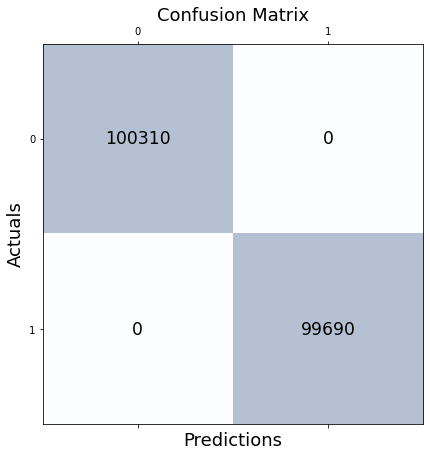

In [ ]:
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize = (12, 7))
ax.matshow(cm, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(cm.shape[0]):
  for j in range(cm.shape[1]):
    ax.text(x = j, y = i, s = cm[i, j], va = 'center', ha = 'center', size = 'xx-large')

plt.xlabel('Predictions', fontsize = 18)
plt.ylabel('Actuals', fontsize = 18)
plt.title('Confusion Matrix', fontsize = 18)
plt.show()

***Precision and Recall***
---

In [ ]:
precision = true_positive / (true_positive + false_positive)
recall = true_positive / (true_positive + false_negative)
f1_score = 2* ((recall * precision) / (recall + precision))
precision, recall, f1_score

(1.0, 1.0, 1.0)

In [ ]:
print('Gradient Boosting Classifier Model Accuracy:', accuracy_score(y_test, y_pred))
print('Gradien Boosting Classifier Model Classification Report:')
print(classification_report(y_test, y_pred))

Gradient Boosting Classifier Model Accuracy: 1.0
Gradien Boosting Classifier Model Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    100310
           1       1.00      1.00      1.00     99690

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000



***Accuracy***
---

In [ ]:
log_model = LogisticRegression()

log_model.fit(X_train, y_train)
y_pred_log_model = log_model.predict(X_test)

In [ ]:
print('Logistic Regression Model Accuracy:', accuracy_score(y_test, y_pred_log_model))
print('Logistic Regression Model Classification Report:')
print(classification_report(y_test, y_pred_log_model))

Logistic Regression Model Accuracy: 0.90223
Logistic Regression Model Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.85      0.90    100310
           1       0.86      0.95      0.91     99690

    accuracy                           0.90    200000
   macro avg       0.91      0.90      0.90    200000
weighted avg       0.91      0.90      0.90    200000



In [ ]:
thresholds = np.linspace(0, 1, 11)
thresholds

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [ ]:
thresholds = np.linspace(0, 1, 21)

accuracies = []

for t in thresholds:
    acc = accuracy_score(y_test, y_pred >= t)
    accuracies.append(acc)
    print('%0.2f %0.3f' % (t, acc))

0.00 0.498
0.05 1.000
0.10 1.000
0.15 1.000
0.20 1.000
0.25 1.000
0.30 1.000
0.35 1.000
0.40 1.000
0.45 1.000
0.50 1.000
0.55 1.000
0.60 1.000
0.65 1.000
0.70 1.000
0.75 1.000
0.80 1.000
0.85 1.000
0.90 1.000
0.95 1.000
1.00 1.000


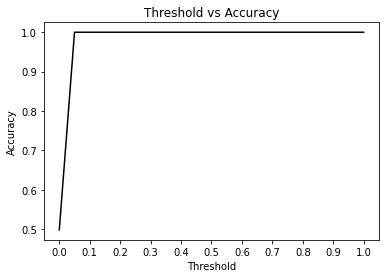

In [ ]:
plt.figure(figsize=(6, 4))

plt.plot(thresholds, accuracies, color='black')

plt.title('Threshold vs Accuracy')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')

plt.xticks(np.linspace(0, 1, 11))

plt.savefig('04_threshold_accuracy.svg')

plt.show()

In [ ]:
scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds: #B
    tp = ((y_pred >= t) & (y_test == 1)).sum()
    fp = ((y_pred >= t) & (y_test == 0)).sum()
    fn = ((y_pred < t) & (y_test == 1)).sum()
    tn = ((y_pred < t) & (y_test == 0)).sum()
    scores.append((t, tp, fp, fn, tn))

df_scores = pd.DataFrame(scores)
df_scores.columns = ['threshold', 'tp', 'fp', 'fn', 'tn']

In [ ]:
df_scores[::10]

,threshold,tp,fp,fn,tn
0,0.0,99690,100310,0,0
10,0.1,99690,0,0,100310
20,0.2,99690,0,0,100310
30,0.3,99690,0,0,100310
40,0.4,99690,0,0,100310
50,0.5,99690,0,0,100310
60,0.6,99690,0,0,100310
70,0.7,99690,0,0,100310
80,0.8,99690,0,0,100310
90,0.9,99690,0,0,100310


In [ ]:
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

In [ ]:
df_scores[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,99690,100310,0,0,1.0,1.0
10,0.1,99690,0,0,100310,1.0,0.0
20,0.2,99690,0,0,100310,1.0,0.0
30,0.3,99690,0,0,100310,1.0,0.0
40,0.4,99690,0,0,100310,1.0,0.0
50,0.5,99690,0,0,100310,1.0,0.0
60,0.6,99690,0,0,100310,1.0,0.0
70,0.7,99690,0,0,100310,1.0,0.0
80,0.8,99690,0,0,100310,1.0,0.0
90,0.9,99690,0,0,100310,1.0,0.0


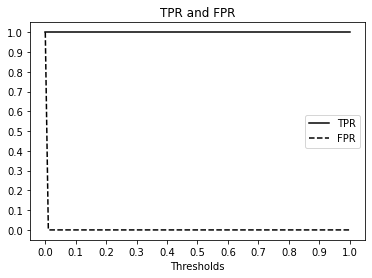

In [ ]:
plt.figure(figsize=(6, 4))

plt.plot(df_scores.threshold, df_scores.tpr, color='black', linestyle='solid', label='TPR')
plt.plot(df_scores.threshold, df_scores.fpr, color='black', linestyle='dashed', label='FPR')
plt.legend()

plt.xticks(np.linspace(0, 1, 11))
plt.yticks(np.linspace(0, 1, 11))

plt.xlabel('Thresholds')
plt.title('TPR and FPR')

# plt.savefig('04_fpr_tpr_plot.svg')

plt.show()

In [ ]:
def tpr_fpr_dataframe(y_test, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        tp = ((y_pred >= t) & (y_test == 1)).sum()
        fp = ((y_pred >= t) & (y_test == 0)).sum()
        fn = ((y_pred < t) & (y_test == 1)).sum()
        tn = ((y_pred < t) & (y_test == 0)).sum()

        scores.append((t, tp, fp, fn, tn))

    df_scores = pd.DataFrame(scores)
    df_scores.columns = ['threshold', 'tp', 'fp', 'fn', 'tn']

    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

    return df_scores

In [ ]:
np.random.seed(1)
y_rand = np.random.uniform(0, 1, size=len(y_test))
df_rand = tpr_fpr_dataframe(y_test, y_rand)
df_rand[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,99690,100310,0,0,1.000000,1.000000
10,0.1,89507,90293,10183,10017,0.897853,0.900140
20,0.2,79497,80244,20193,20066,0.797442,0.799960
30,0.3,69530,70171,30160,30139,0.697462,0.699541
40,0.4,59696,60306,39994,40004,0.598816,0.601196
50,0.5,49702,50412,49988,49898,0.498566,0.502562
60,0.6,39843,40207,59847,60103,0.399669,0.400827
70,0.7,29926,30168,69764,70142,0.300191,0.300748
80,0.8,19837,20053,79853,80257,0.198987,0.199910
90,0.9,9916,10085,89774,90225,0.099468,0.100538


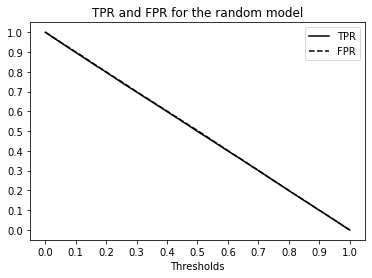

In [ ]:
plt.figure(figsize=(6, 4))

plt.plot(df_rand.threshold, df_rand.tpr, color='black', linestyle='solid', label='TPR')
plt.plot(df_rand.threshold, df_rand.fpr, color='black', linestyle='dashed', label='FPR')
plt.legend()

plt.xticks(np.linspace(0, 1, 11))
plt.yticks(np.linspace(0, 1, 11))

plt.xlabel('Thresholds')
plt.title('TPR and FPR for the random model')

plt.savefig('04_fpr_tpr_plot_random.svg')

plt.show()

In [ ]:
num_neg = (y_test == 0).sum()
num_pos = (y_test == 1).sum()

y_ideal = np.repeat([0, 1], [num_neg, num_pos])
y_pred_ideal = np.linspace(0, 1, num_neg + num_pos)

df_ideal = tpr_fpr_dataframe(y_ideal, y_pred_ideal)
df_ideal[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,99690,100310,0,0,1.000000,1.000000
10,0.1,99690,80310,0,20000,1.000000,0.800618
20,0.2,99690,60310,0,40000,1.000000,0.601236
30,0.3,99690,40310,0,60000,1.000000,0.401854
40,0.4,99690,20310,0,80000,1.000000,0.202472
50,0.5,99690,310,0,100000,1.000000,0.003090
60,0.6,80000,0,19690,100310,0.802488,0.000000
70,0.7,60000,0,39690,100310,0.601866,0.000000
80,0.8,40000,0,59690,100310,0.401244,0.000000
90,0.9,20000,0,79690,100310,0.200622,0.000000


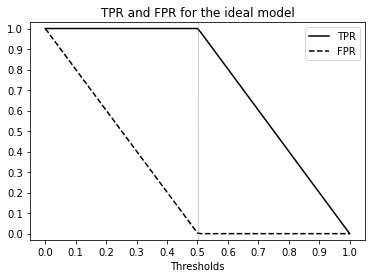

In [ ]:
plt.figure(figsize=(6, 4))

plt.plot(df_ideal.threshold, df_ideal.tpr, color='black', linestyle='solid', label='TPR')
plt.plot(df_ideal.threshold, df_ideal.fpr, color='black', linestyle='dashed', label='FPR')
plt.legend()

plt.xticks(np.linspace(0, 1, 11))
plt.yticks(np.linspace(0, 1, 11))

plt.vlines(1 - y_test.mean(), -1, 2, linewidth=0.5, linestyle='dashed', color='grey')
plt.ylim(-0.03, 1.03)

plt.xlabel('Thresholds')
plt.title('TPR and FPR for the ideal model')

plt.savefig('04_fpr_tpr_plot_ideal.svg')

plt.show()

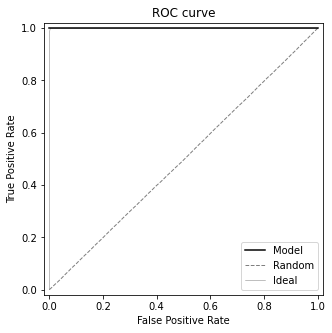

In [ ]:
plt.figure(figsize=(5, 5))

plt.plot(df_scores.fpr, df_scores.tpr, color='black', label='Model')
plt.plot(df_rand.fpr, df_rand.tpr, color='black', lw=1,
         linestyle='dashed', alpha=0.5, label='Random')
plt.plot(df_ideal.fpr, df_ideal.tpr, color='black', lw=0.5,
         linestyle='solid', alpha=0.5, label='Ideal')

plt.legend()

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC curve')

plt.savefig('04_roc_curve_with_baselines.svg')

plt.show()

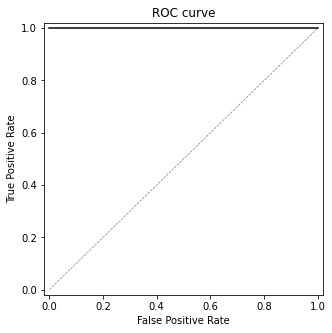

In [ ]:
plt.figure(figsize=(5, 5))

plt.plot(df_scores.fpr, df_scores.tpr, color='black')
plt.plot([0, 1], [0, 1], color='black', lw=0.7, linestyle='dashed', alpha=0.5)

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC curve')

plt.savefig('04_roc_curve.svg')

plt.show()

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

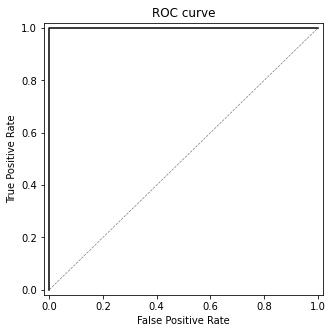

In [ ]:
plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, color='black')
plt.plot([0, 1], [0, 1], color='black', lw=0.7, linestyle='dashed', alpha=0.5)

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC curve')

plt.show()

In [ ]:
params = gb_model.get_params()
params_table = pd.DataFrame.from_dict(params, orient = 'index', columns = ['Value'])
print(params_table)

                                 Value
ccp_alpha                          0.0
criterion                 friedman_mse
init                              None
learning_rate                      0.1
loss                          log_loss
max_depth                            3
max_features                      None
max_leaf_nodes                    None
min_impurity_decrease              0.0
min_samples_leaf                     1
min_samples_split                    2
min_weight_fraction_leaf           0.0
n_estimators                       100
n_iter_no_change                  None
random_state                      None
subsample                          1.0
tol                             0.0001
validation_fraction                0.1
verbose                              0
warm_start                       False


In [ ]:
params = log_model.get_params()
params_table = pd.DataFrame.from_dict(params, orient = 'index', columns = ['Value'])
print(params_table)

                    Value
C                     1.0
class_weight         None
dual                False
fit_intercept        True
intercept_scaling       1
l1_ratio             None
max_iter              100
multi_class          auto
n_jobs               None
penalty                l2
random_state         None
solver              lbfgs
tol                0.0001
verbose                 0
warm_start          False


***K-Fold Cross Validation***
---

In [ ]:
# Define the cross-validation method
kfold = KFold(n_splits = 3, shuffle = True, random_state = 42)

# Initialize a list to store the cross-validation accuracy scores
scores = []

# Loop over the folds
for fold, (train_idx, test_idx) in enumerate(kfold.split(X, y)):

    # Get the training and testing data for this fold
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Train the model on the training data
    gb_model.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = gb_model.predict(X_test)

    # Calculate the accuracy score for this fold and append it to the list of scores
    score = accuracy_score(y_test, y_pred)
    scores.append(score)

    # Print the accuracy score for this fold
    print(f'Fold {fold+1} accuracy: {score:.3f}')

# Print the mean and standard deviation of the cross-validation accuracy scores
print(f'Mean accuracy: {np.mean(scores):.3f}')
print(f'Standard deviation: {np.std(scores):.3f}')

Fold 1 accuracy: 1.000
Fold 2 accuracy: 1.000
Fold 3 accuracy: 1.000
Mean accuracy: 1.000
Standard deviation: 0.000
